# AutoBET: Predictive Soccer Outcome Modelling and Algorithmic Betting System

## Load data

In [1]:
import pandas as pd
import numpy as np
import sqlite3
import math

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

database_path = "../../data/database.sqlite"

with sqlite3.connect(database_path) as con:
    sql = '''
    SELECT *
    FROM match 
    '''
    df_match = pd.read_sql_query(sql, con)
    
with sqlite3.connect(database_path) as con:
    sql = '''
    SELECT player_api_id, overall_rating
    FROM player_attributes
    '''
    player_lvl = pd.read_sql_query(sql, con)

## Preprocess data

Extract relevant data and join into single table

In [2]:
player_lvl = player_lvl.groupby('player_api_id').mean().to_dict()
def get_rating(player_id):
    if math.isnan(player_id):
        return np.nan
    return player_lvl['overall_rating'][player_id]

def get_outcome(home, away):
    if home > away:
        return 0
    elif home == away:
        return 1
    else:
        return 2

df = df_match[['stage', 'home_team_goal', 'away_team_goal','B365H','B365D','B365A','BWH',
               'BWD','BWA','IWH','IWD','IWA','LBH','LBD','LBA','WHH','WHD','WHA','SJH','SJD','SJA',
               'VCH','VCD','VCA','GBH','GBD','GBA']]

odds = df.iloc[:, 3:]

df_tmp = df_match[['home_player_1','home_player_2','home_player_3','home_player_4','home_player_5',
                   'home_player_6','home_player_7','home_player_8','home_player_9','home_player_10',
                   'home_player_11','away_player_1','away_player_2','away_player_3','away_player_4',
                   'away_player_5','away_player_6','away_player_7','away_player_8','away_player_9',
                   'away_player_10','away_player_11']]

df = pd.concat([df, df_tmp.applymap(lambda x: get_rating(x))], axis=1)
df['target'] = df.apply(lambda x: get_outcome(x['home_team_goal'], x['away_team_goal']), axis=1)
df = df.drop(['home_team_goal', 'away_team_goal'], axis=1)

df.dropna(inplace=True)
df.head()

,stage,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,WHH,WHD,WHA,SJH,SJD,SJA,VCH,VCD,VCA,GBH,GBD,GBA,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,home_player_8,home_player_9,home_player_10,home_player_11,away_player_1,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11,target
145,24,3.00,3.4,2.30,2.95,3.25,2.20,2.80,3.1,2.2,2.75,3.25,2.20,2.62,3.2,2.30,3.05,3.20,2.30,2.65,3.25,2.35,2.90,3.25,2.30,63.214286,62.733333,70.151515,61.800000,69.192308,61.500000,63.538462,68.040000,54.600000,65.285714,62.666667,64.952381,71.388889,60.750000,66.750000,70.185185,69.333333,68.000000,65.000000,71.666667,64.611111,71.826087,0
153,25,2.80,3.2,2.37,3.10,3.00,2.20,2.80,3.1,2.2,3.20,3.20,2.00,3.20,3.2,2.00,3.05,3.25,2.25,2.65,3.20,2.35,2.90,3.20,2.30,65.050000,63.142857,62.454545,63.227273,64.625000,71.800000,67.500000,66.000000,69.700000,67.129032,63.500000,71.266667,68.142857,70.375000,69.888889,70.720000,68.444444,68.541667,71.739130,71.190476,69.714286,69.130435,2
155,25,1.40,4.5,8.00,1.35,4.00,9.00,1.35,4.0,7.0,1.36,4.00,7.00,1.36,4.0,7.00,1.36,4.50,8.50,1.30,4.35,8.00,1.35,4.33,8.50,67.888889,71.060606,68.958333,69.823529,72.166667,72.107143,77.972973,71.416667,79.692308,68.086957,70.896552,67.095238,67.625000,61.750000,63.722222,63.411765,64.714286,68.000000,70.521739,67.500000,65.666667,66.083333,0
162,26,4.50,3.6,1.75,4.70,3.30,1.70,4.20,3.2,1.7,4.00,3.40,1.72,4.33,3.3,1.70,4.75,3.50,1.73,4.35,3.30,1.75,4.50,3.40,1.75,63.214286,62.733333,70.151515,65.285714,68.040000,69.192308,61.800000,63.538462,54.600000,67.846154,62.666667,67.888889,71.060606,72.166667,64.100000,69.407407,72.107143,69.240000,79.692308,77.972973,71.416667,70.896552,0
168,26,1.75,3.5,4.75,1.60,3.55,5.05,1.65,3.4,4.2,1.61,3.25,5.00,1.67,3.4,4.33,1.67,3.50,5.00,1.65,3.50,4.50,1.65,3.50,5.00,67.095238,67.625000,66.250000,61.750000,63.722222,64.714286,68.000000,70.521739,66.083333,65.666667,67.500000,63.666667,60.400000,58.333333,54.600000,62.333333,58.666667,65.800000,58.750000,74.928571,63.000000,67.111111,1


In [3]:
df.to_csv('../../data/processed.csv')

## Modeling and evaluation

#### XGBoost

In [4]:
import numpy as np
import xgboost as xgb
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split

# create data for model
X = df.drop('target', axis=1).values
y = df['target'].values

# keep 10% backtest data
X, X_bt, y, y_bt = train_test_split(X, y, test_size=0.15, random_state=43)

# keep 20% test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=43)

# train xgboost classifier and get predictions
model = xgb.XGBClassifier(colsample_bytree=0.35,gamma=0,learning_rate=0.1,max_depth=3,n_estimators=17,
                          min_child_weight=0,objective='multi:softmax',reg_alpha=0,scale_pos_weight=1,
                          subsample=0.55).fit(X_train, y_train)
preds = model.predict_proba(X_test)

# evaluate model performance
print(classification_report(y_test, [np.argmax(p) for p in preds]))
print(accuracy_score(y_test, [np.argmax(p) for p in preds]))

             precision    recall  f1-score   support

          0       0.56      0.84      0.67       709
          1       0.35      0.02      0.03       397
          2       0.48      0.51      0.50       396

avg / total       0.48      0.54      0.46      1502

0.536617842876


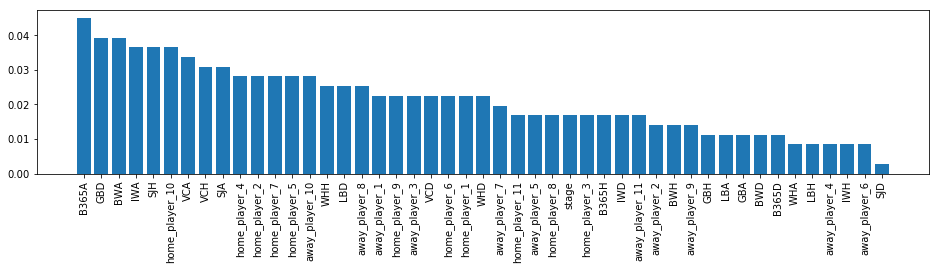

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

tmp = df.drop(['target'], axis=1)
feat_importance = pd.DataFrame(pd.concat([pd.Series(model.feature_importances_),
                                          pd.Series(tmp.columns)], axis=1)).sort_values(0, ascending=False)

fig, ax = plt.subplots(1,1, figsize=(16, 3))
ax.bar(range(len(feat_importance)), feat_importance.iloc[:,0])
ax.set_xticks(range(47))
ax.set_xticklabels(feat_importance.iloc[:, 1])
for tick in ax.get_xticklabels():
    tick.set_rotation(90)
plt.show()

#### Neural Network

In [5]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers.advanced_activations import PReLU
from keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split

# create data for model
X = df.drop('target', axis=1).values
y = df['target'].values

# keep 15% backtest data
X, X_bt, y, y_bt = train_test_split(X, y, test_size=0.2, random_state=43)

# keep 15% test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

# define network architecture
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1]))
model.add(PReLU())
model.add(Dropout(0.15))
model.add(Dense(64))
model.add(PReLU())
model.add(Dropout(0.15))
model.add(Dense(3, activation='softmax'))

# compile model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
cb = [EarlyStopping(monitor='val_loss', patience=3)]

# train the network
model.fit(X_train, y_train.reshape((-1, 1)), validation_split=0.2, 
          epochs=100, batch_size=128, callbacks=cb, verbose=0)

# get the predictions
preds = model.predict_proba(X_test, verbose=0)

# evaluate model performance
print(classification_report(y_test, [np.argmax(p) for p in preds]))
print(accuracy_score(y_test, [np.argmax(p) for p in preds]))

             precision    recall  f1-score   support

          0       0.51      0.93      0.66       868
          1       0.00      0.00      0.00       483
          2       0.62      0.36      0.45       534

avg / total       0.41      0.53      0.43      1885

0.532095490716


/home/daniel/miniconda3/envs/three/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Automatic strategies

In [6]:
# Predict on backtest data
X_bt = pd.DataFrame(X_bt, columns=df.columns[:-1])
preds = model.predict_proba(X_bt.values)
preds = pd.DataFrame(1/preds, columns=['prob_h', 'prob_d', 'prob_a'])

X_bt = pd.concat([X_bt, preds], axis=1)
odds = X_bt.iloc[:, 1:25]
X_bt.head()

,stage,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,WHH,WHD,WHA,SJH,SJD,SJA,VCH,VCD,VCA,GBH,GBD,GBA,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,home_player_8,home_player_9,home_player_10,home_player_11,away_player_1,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11,prob_h,prob_d,prob_a
0,16.0,3.20,3.25,2.25,3.30,3.30,2.25,2.9,3.3,2.2,3.25,3.25,2.20,3.30,3.25,2.2,3.20,3.3,2.3,3.25,3.25,2.40,3.20,3.25,2.20,69.913043,65.055556,73.722222,69.285714,72.222222,69.321429,73.318182,77.423077,71.592593,76.160000,76.807692,79.380952,72.333333,72.260870,76.611111,77.809524,76.941176,75.964286,77.346154,79.028571,76.318182,81.432432,2.853540,3.421250,2.799025
1,7.0,2.30,3.30,3.10,2.25,3.40,3.30,2.2,3.3,3.1,2.30,3.30,2.88,2.38,3.40,2.9,2.30,3.3,3.2,2.30,3.40,3.30,2.25,3.40,3.30,70.409091,71.875000,69.666667,71.318182,69.900000,70.764706,75.666667,73.833333,72.333333,75.833333,69.083333,76.625000,70.600000,76.933333,73.105263,68.086957,72.285714,68.500000,72.272727,76.227273,75.488372,74.555556,2.300480,3.450643,3.629672
2,1.0,1.73,3.25,5.50,1.75,3.27,4.85,1.7,3.4,4.5,1.67,3.30,4.50,1.70,3.25,5.0,1.75,3.4,5.0,1.73,3.40,5.00,1.75,3.40,4.75,76.823529,73.258065,69.880000,73.794118,74.757576,72.916667,75.100000,71.043478,80.526316,71.958333,72.459459,73.310345,72.685714,73.060606,77.166667,70.775000,71.968750,76.717391,73.607143,76.266667,71.625000,76.052632,2.056826,3.483152,4.410774
3,10.0,2.15,3.10,3.60,2.15,3.10,3.40,2.2,3.1,3.1,2.20,3.00,3.00,2.20,3.10,3.5,2.20,3.0,3.4,2.15,3.20,4.00,2.15,3.10,3.30,73.333333,71.863636,69.285714,68.066667,73.448276,69.100000,67.000000,68.375000,70.210526,71.200000,70.357143,75.956522,74.105263,72.333333,73.611111,60.857143,65.400000,72.000000,68.153846,73.750000,75.263158,72.705882,2.374806,3.128746,3.856596
4,27.0,2.30,3.20,3.20,2.15,3.30,3.20,2.3,3.2,2.8,2.38,3.00,3.20,2.35,3.10,3.2,2.40,3.2,3.0,2.40,3.25,3.25,2.25,3.20,3.10,76.823529,73.181818,68.578947,73.794118,74.757576,75.100000,72.916667,68.708333,77.258065,71.958333,80.526316,81.333333,80.463415,76.292683,75.529412,76.634146,74.419355,78.500000,78.488889,75.837838,82.571429,81.755556,2.408283,3.315698,3.531437


In [7]:
import numpy as np
import pandas as pd

''' Betting strategy #1:

## STRATEGY ##

This betting strategy compares the confidence of soccer match outcomes from 8 different betting houses 
with a machine learning model. We select the betting house who underestimates the winning team performance
the most. A bet is placed whose size is proportional to the magnitude of the underestimation.

## EXAMPLE ##

Real Madrid vs. Levante
B365 odds: 1.45 / 3.40 / 6.15
BWIN odds: 1.35 / 4.10 / 5.90
ML odds:   1.10 / 3.90 / 7.15

All predictors think Real Madrid is going to win. However, the ML model is more certain than the houses. In
this case, B365 underestimates Real Madrid the most. The algorithm selects this betting house and bets
1.45/1.1 = $1.32 on Real Madrid (1.45).
'''

def strategy_1(x, true, preds):
    
    # function to determine magnitude of underestimation
    def _magnitude(odds, preds):
        x = np.array([]).reshape(len(odds), 0)
        for house in set([h[:-1] for h in odds.columns]):
            filter_col = [col for col in odds.columns if col.startswith(house)]
            x = np.concatenate([x, np.array(odds[filter_col]) / np.array(preds)], axis=1)
        return pd.DataFrame(x, columns=odds.columns)

    # function to select optimal betting house
    def _selection(x, preds, true):
        idxs = [[np.argmin(p) + (3 * i) for i in range(8)] for p in preds.values]
        action = []
        for i in range(len(x)):
            best = np.max(x.iloc[i, idxs[i]])
            if best > 1:
                action.append((np.argmax(x.iloc[i, idxs[i]]), best, idxs[i][0]))
            else:
                action.append((np.nan, np.nan, np.nan))
        res = pd.concat([pd.DataFrame(action), pd.Series(true)], axis=1)
        res.columns = ['house', 'stake', 'pred', 'true']
        return res
    
    # apply strategy 1
    results = _selection(_magnitude(x, preds), preds, true)

    # get the odds for the winning bets
    win_odds = []
    for res in results[results.pred == results.true].reset_index().values:
        win_odds.append(x.loc[res[0], res[1]])
    win_odds = pd.DataFrame({'index': results[results.pred == results.true].reset_index()['index'],
                             'odd': pd.Series(win_odds)})
    
    # merge winning odds and payoff with results
    results = pd.merge(results.reset_index(), win_odds, how='outer', on='index')
    results = results.fillna(0)
    results = pd.concat([results, results.stake * results.odd], axis=1)
    results.columns = ['match', 'house', 'stake', 'pred', 'true', 'odd', 'winnings']
    
    return results

In [8]:
import matplotlib.pyplot as plt
from matplotlib import gridspec
%matplotlib inline

''' Evaluation plot

This plot evaluates the strategy on the backtest data. Three plots are made: (1) a cumulative performance 
plot, (2) a net returns plot and (3) a transactions plot. Plot 1 shows the cumulative profit made on the 
backtest matches. Plot 2 shows the profit per match. Plot 3 shows the bets placed on the matches.

# Arguments:
    x:  DataFrame, results dataframe from strategy_#() output
    
# Returns:
    Evaluation plot
'''

def plot(x):
    # define plotting data
    flow = np.cumsum(x.winnings - x.stake)
    size = range(len(flow))
    zero = np.zeros(len(flow))

    # define figures
    fig = plt.figure(figsize=(24, 12)) 
    gs = gridspec.GridSpec(3, 1, height_ratios=[2, 1, 1]) 

    # plot cumulative profit
    ax0 = plt.subplot(gs[0])
    ax0.grid(color='grey', linestyle='-', linewidth=1, alpha=0.5)
    ax0.plot(size, flow, '#4572a7', linewidth = 2)
    ax0.plot(size, zero, '#000000', linewidth = 1)
    ax0.fill_between(size, flow, zero, where=zero >= flow, facecolor='#dbe3ee', interpolate=True)
    ax0.fill_between(size, flow, zero, where=zero <= flow, facecolor='#dbe3ee', interpolate=True)
    ax0.set_title('Cumulative Performance: {}% of €{} invested'.format(
        format(((sum(x.winnings) / sum(x.stake))-1)*100, '.2f'),
        format(sum(x.stake), '.2f')), loc='left', fontsize=15)

    # plot returns
    ax1 = plt.subplot(gs[1])
    ax1.grid(color='grey', linestyle='-', linewidth=1, alpha=0.5)
    ax1.bar(size, x.winnings-x.stake, 2, color='#4572a7')
    ax1.plot(size, zero, color='#000000', linewidth=1)
    ax1.set_title('Returns', loc='left', fontsize=15)

    # plot transactions
    ax2 = plt.subplot(gs[2])
    ax2.grid(color='grey', linestyle='-', linewidth=1, alpha=0.5)
    ax2.bar(size, x.stake, 2, color='#4572a7')
    ax2.set_title('Transactions', loc='left', fontsize=15)

    plt.tight_layout()

In [9]:
results = strategy_1(odds, y_bt, preds)
results.sample(10)

,match,house,stake,pred,true,odd,winnings
1557,1557,0,0.000000,0.0,0,0.0,0.0
837,837,0,0.000000,0.0,2,0.0,0.0
1167,1167,0,0.000000,0.0,1,0.0,0.0
469,469,0,0.000000,0.0,2,0.0,0.0
263,263,0,0.000000,0.0,0,0.0,0.0
1014,1014,0,0.000000,0.0,2,0.0,0.0
381,381,0,0.000000,0.0,0,0.0,0.0
1385,1385,0,0.000000,0.0,0,0.0,0.0
456,456,LBH,1.142402,0.0,2,0.0,0.0
10,10,0,0.000000,0.0,2,0.0,0.0


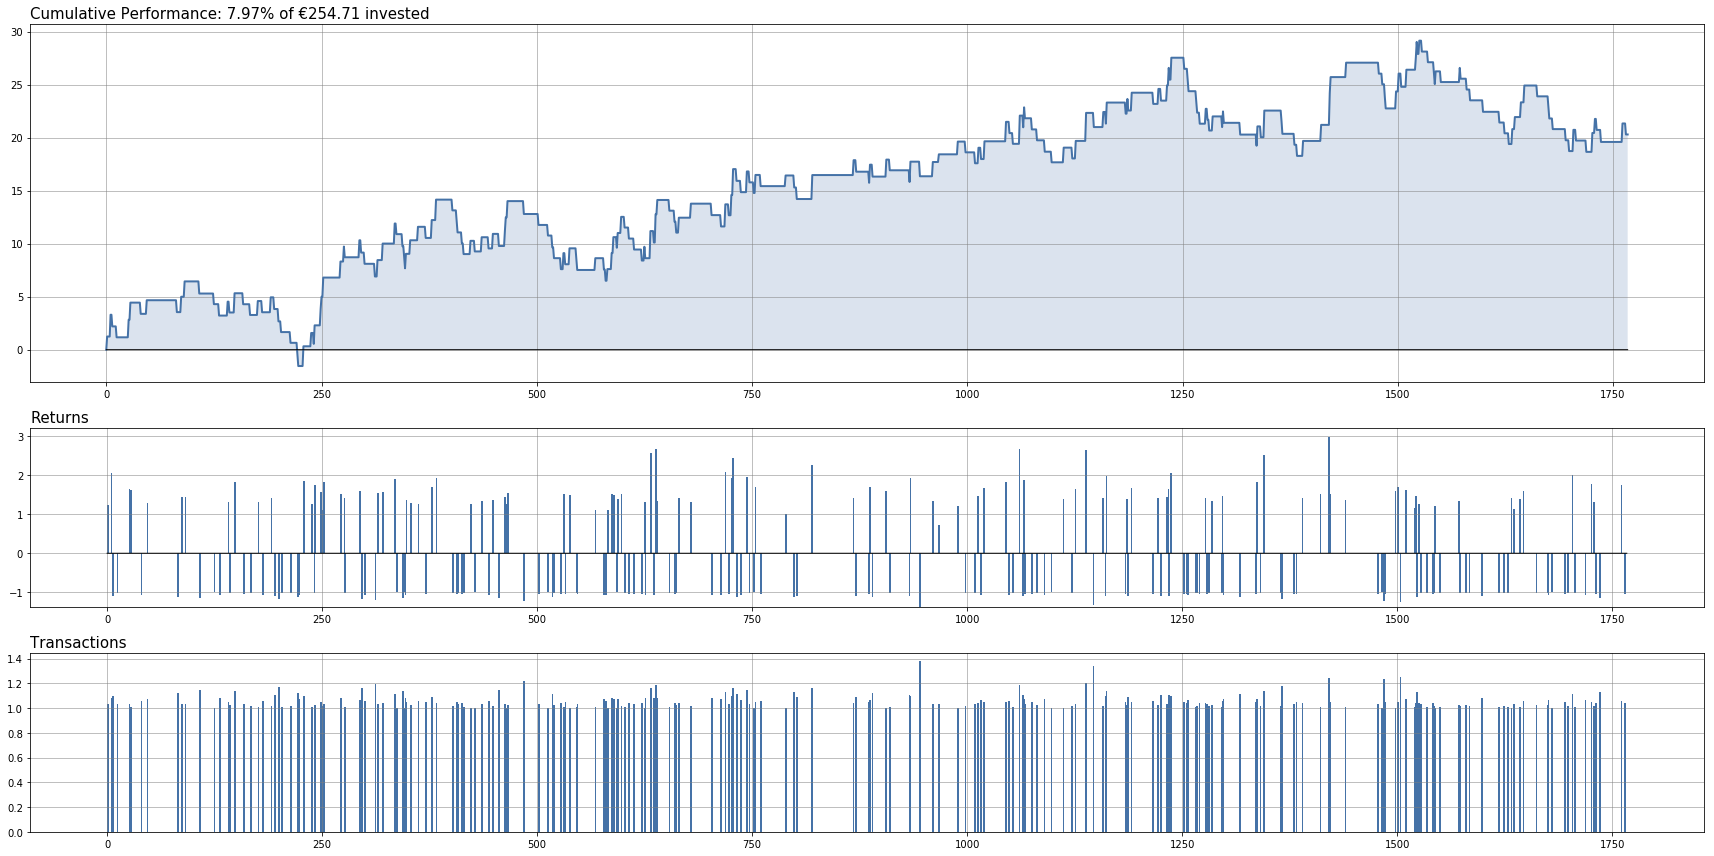

In [10]:
plot(results)